In [3]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Cricket.csv',encoding='latin1')

In [1]:
#  Mat - matches played
# NO - knocked out
# HS-highest score
# Ave-average
# BF - bowling
# SR - strike rate
# 100/50/0  - per person scores.

data.sample(5)

NameError: name 'data' is not defined

In [4]:
data.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [6]:
data.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [7]:
# span is in duration so calculating the start and end separately

x='1989-2023'
s=x.split('-')
int(s[1]) - int(s[0])

34

In [8]:

data['start'] = data['Span'].apply(lambda x:x.split('-')[0])
data['end'] = data['Span'].apply(lambda x:x.split('-')[1])

In [9]:
data.sample(5)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end
41,Shoaib Malik (PAK),1999-2017,252,228,36,6765,143,35.23,8278,81.72,9,39,13,1999,2017
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
59,SR Watson (AUS),2002-2015,190,169,27,5757,185*,40.54,6365,90.44,9,33,12,2002,2015
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16,1990,2007


In [10]:
data = data.drop(['Span'],axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     object 
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  start   79 non-null     object 
 13  end     79 non-null     object 
dtypes: float64(2), int64(8), object(4)
memory usage: 8.8+ KB


In [12]:
data['start'] = data['start'].astype('int')

In [13]:
data['end'] = data['end'].astype('int')

In [14]:
data['exp'] = data['end']-data['start']

In [15]:
data.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end,exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17


In [16]:
data['HS']

0     200*
1      169
2      164
3      189
4      144
      ... 
74    133*
75     96*
76    120*
77     156
78     112
Name: HS, Length: 79, dtype: object

In [17]:
# need to remove star from end and need only digit data

data['HS']=data['HS'].str.extract('(\d+)').astype('int')

In [18]:
max(data['HS'])

264

In [19]:
data.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end,exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17


In [20]:
## Another method is this one. We can use this also to remove *
data['HS'] = data['HS'].apply(lambda x:x.split('*')[0])

AttributeError: 'int' object has no attribute 'split'

In [25]:
data['HS']=data['HS'].astype('int')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     int32  
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  start   79 non-null     int32  
 13  end     79 non-null     int32  
 14  exp     79 non-null     int32  
dtypes: float64(2), int32(4), int64(8), object(1)
memory usage: 8.1+ KB


In [27]:
data.columns

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0', 'start', 'end', 'exp'],
      dtype='object')

In [28]:
# outlier treatment

features= ['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100','50', '0', 'exp']
# for Mat column only... 
p99=data['Mat'].quantile(0.99)
p1=data['Mat'].quantile(0.01)
p99

451.29999999999995

In [29]:
# whichever values are grter than p99 it will be replace by p99

data['Mat'][data['Mat']>p99]=p99

In [30]:
# whichever values are less than p1 it will be replace by p1

data[data['Mat']<p1]['Mat']=p1

In [31]:
features= ['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100','50', '0', 'exp']
for each_feature in features:
    p99=data[each_feature].quantile(0.99)
    p1=data[each_feature].quantile(0.01)

    data[each_feature][data[each_feature]>p99]=p99
    data[data[each_feature]<p1][each_feature]=p1

In [32]:
features

['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0', 'exp']

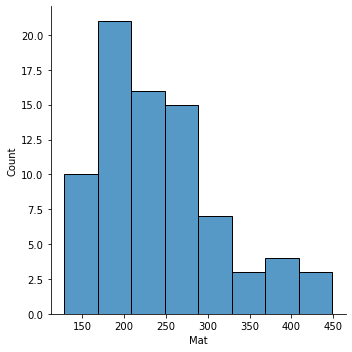

In [33]:
import seaborn as sns

sns.displot(data['Mat'])

<AxesSubplot:xlabel='Mat', ylabel='Density'>

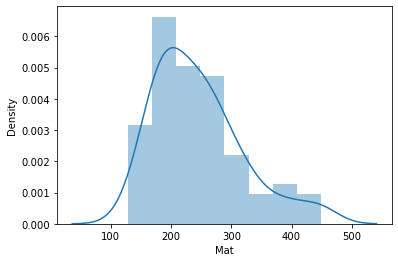

In [34]:
sns.distplot(data['Mat'])

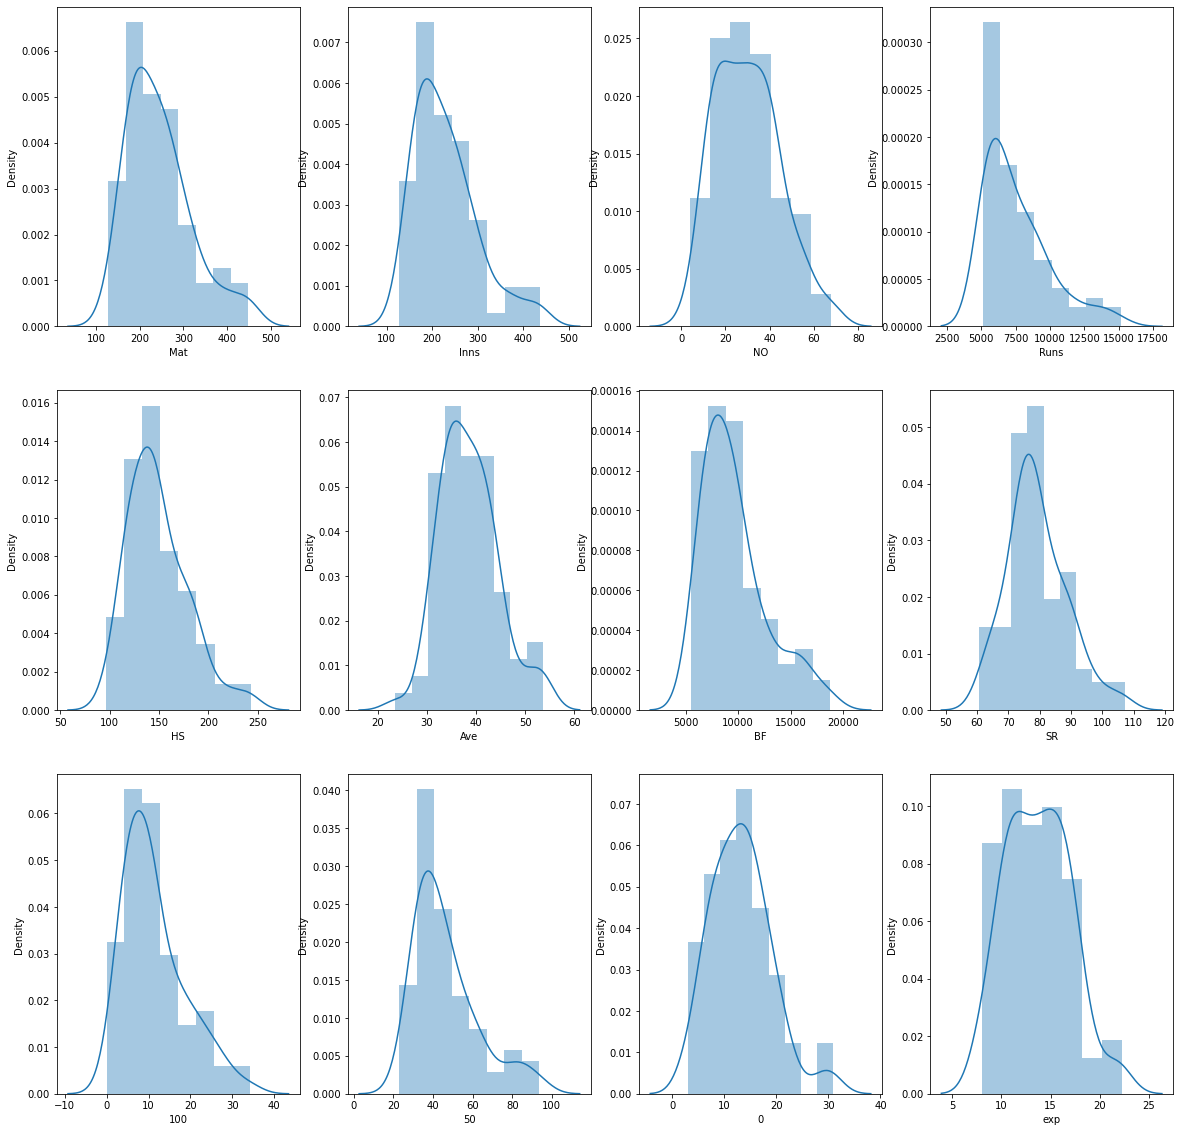

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
for n,each in enumerate(features):
    # note- we have used n+1 here  - bcoz it starts from 1 and not 0. so it goes like 1,2,3,4,5,......
    plt.subplot(3,4,n+1)
    sns.distplot(data[each])


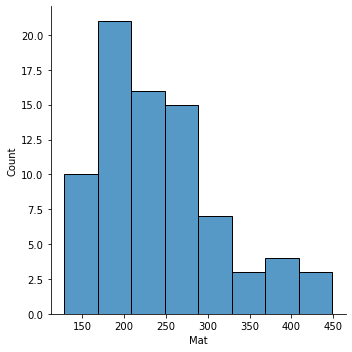

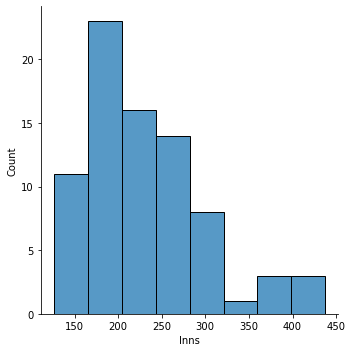

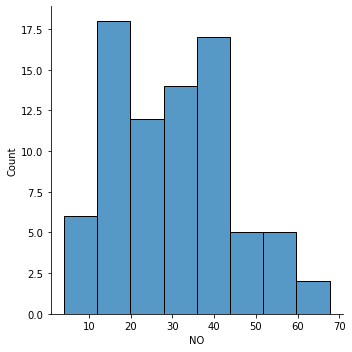

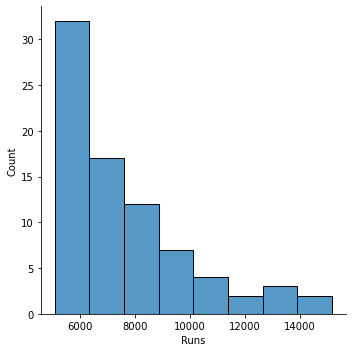

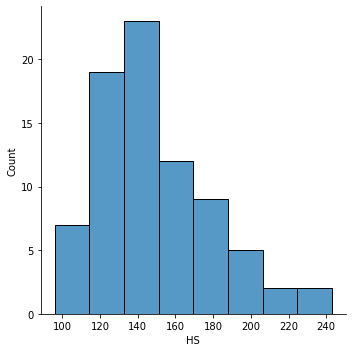

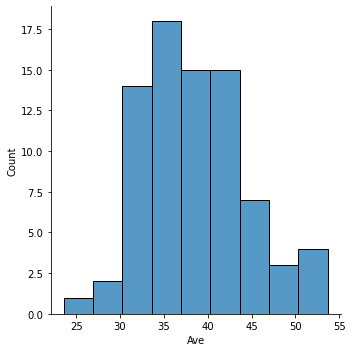

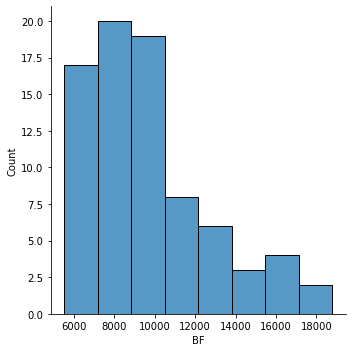

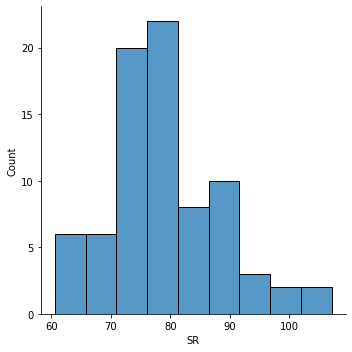

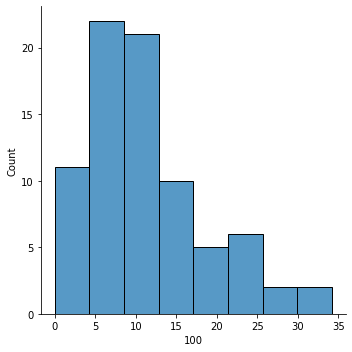

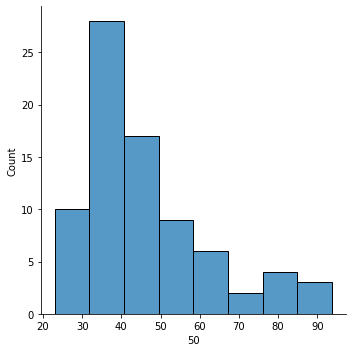

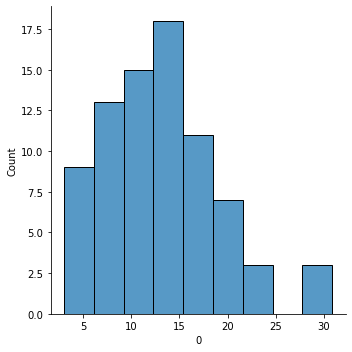

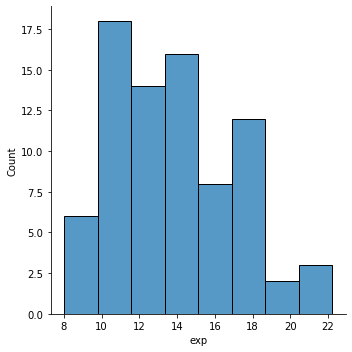

In [36]:
# plt.figure(figsize=(20,20))
for n,each in enumerate(features):
    # note- we have used n+1 here  - bcoz it starts from 1 and not 0. so it goes like 1,2,3,4,5,......
#     plt.subplot(3,4,n+1)
    sns.displot(data[each])


In [37]:
data[['Player','HS']].sort_values(by='HS',ascending=False)

,Player,HS
65,RG Sharma (INDIA),242.94
63,MJ Guptill (NZ),237.00
24,V Sehwag (Asia/ICC/INDIA),219.00
17,CH Gayle (ICC/WI),215.00
0,SR Tendulkar (INDIA),200.00
...,...,...
78,Abdul Razzaq (Asia/PAK),112.00
64,MEK Hussey (AUS),109.00
38,MG Bevan (AUS),108.00
35,Saleem Malik (PAK),102.00


<AxesSubplot:>

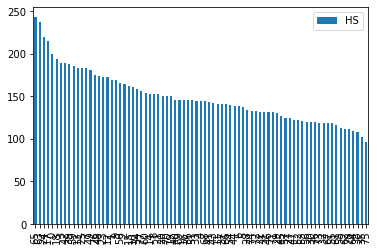

In [38]:
data[['Player','HS']].sort_values(by='HS',ascending=False).plot(kind='bar')

                       Player      HS
65          RG Sharma (INDIA)  242.94
63            MJ Guptill (NZ)  237.00
24  V Sehwag (Asia/ICC/INDIA)  219.00
17          CH Gayle (ICC/WI)  215.00
0        SR Tendulkar (INDIA)  200.00
18          Saeed Anwar (PAK)  194.00
3     ST Jayasuriya (Asia/SL)  189.00
42          IVA Richards (WI)  189.00
39             G Kirsten (SA)  188.00
59            SR Watson (AUS)  185.00


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'RG Sharma\xa0(INDIA)'),
  Text(1, 0, 'MJ Guptill\xa0(NZ)'),
  Text(2, 0, 'V Sehwag\xa0(Asia/ICC/INDIA)'),
  Text(3, 0, 'CH Gayle\xa0(ICC/WI)'),
  Text(4, 0, 'SR Tendulkar\xa0(INDIA)'),
  Text(5, 0, 'Saeed Anwar\xa0(PAK)'),
  Text(6, 0, 'ST Jayasuriya\xa0(Asia/SL)'),
  Text(7, 0, 'IVA Richards\xa0(WI)'),
  Text(8, 0, 'G Kirsten\xa0(SA)'),
  Text(9, 0, 'SR Watson\xa0(AUS)')])

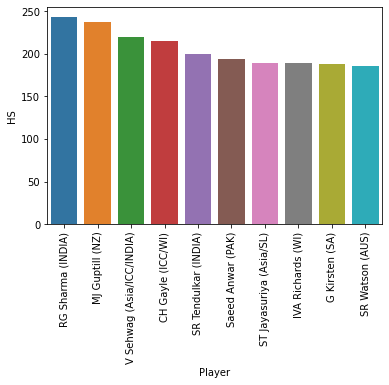

In [39]:
viz_data=data[['Player','HS']].sort_values(by='HS',ascending=False).head(10)
print(viz_data)
sns.barplot(x='Player',y='HS',data =viz_data)
plt.xticks(rotation=90)

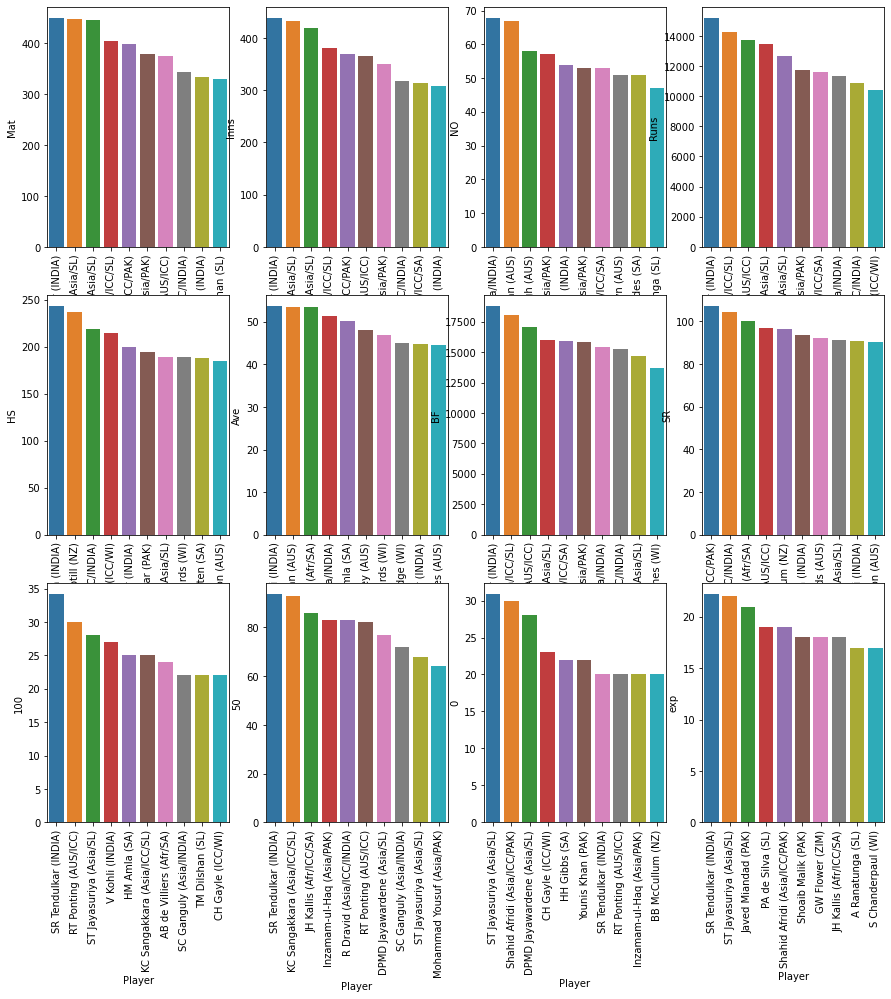

In [40]:
plt.figure(figsize=(15,15))
for n,feature in enumerate(features):
    viz_data=data[['Player',feature]].sort_values(by=feature,ascending=False).head(10)
    plt.subplot(3,4,n+1)
    # print(viz_data)
    sns.barplot(x='Player',y=feature,data =viz_data)
    plt.xticks(rotation=90)

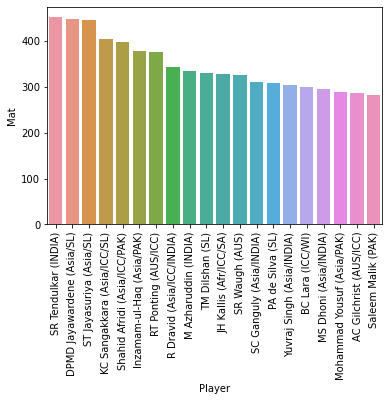

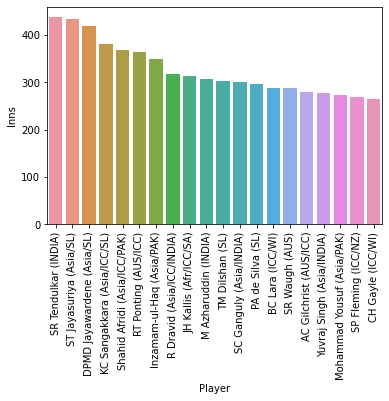

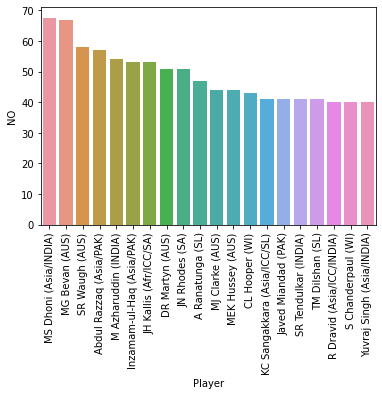

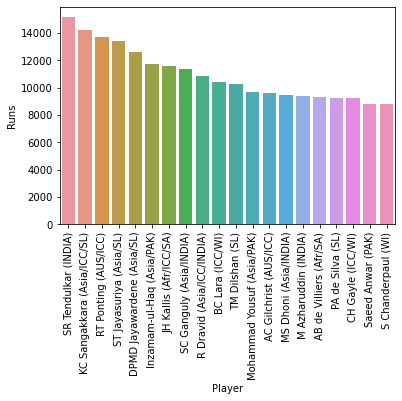

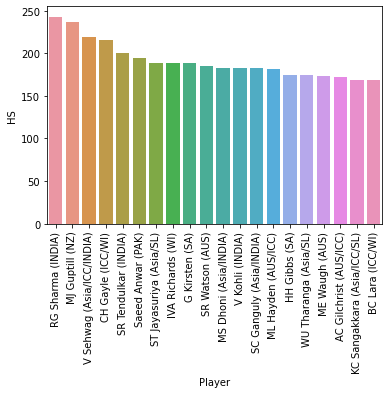

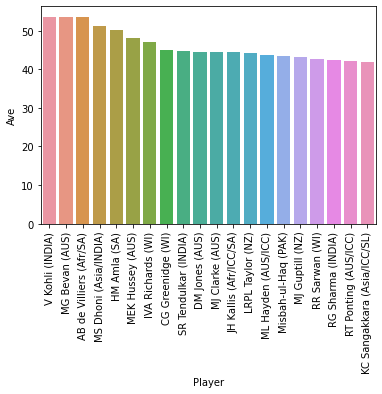

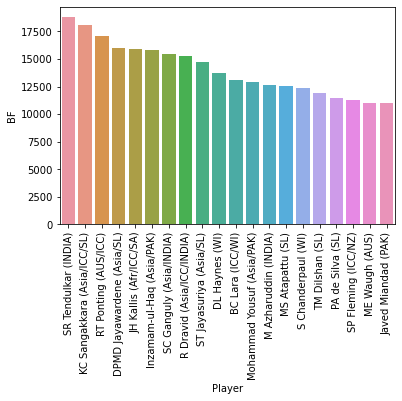

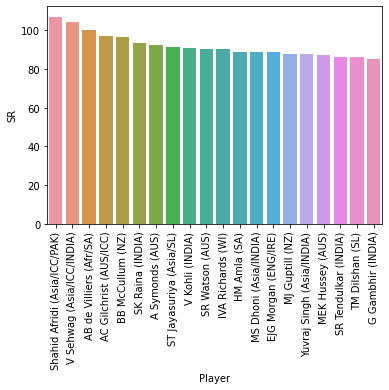

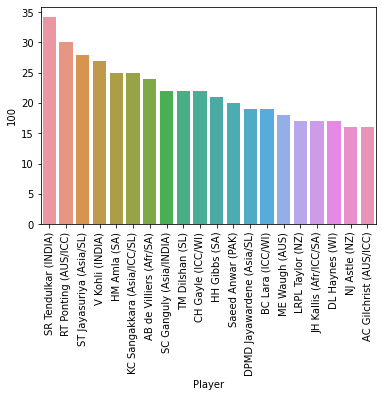

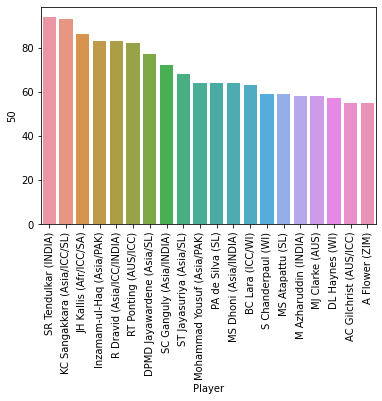

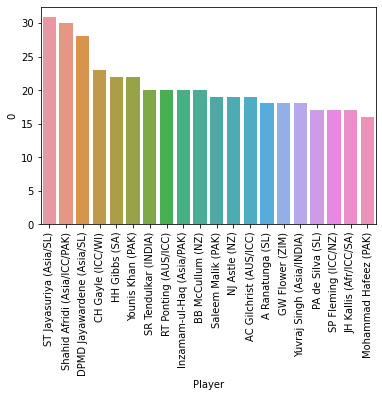

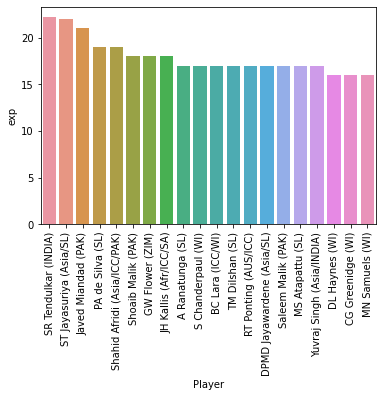

In [40]:
# plt.figure(figsize=(15,15))
for n,feature in enumerate(features):
    viz_data=data[['Player',feature]].sort_values(by=feature,ascending=False).head(20)
#     plt.subplot(3,4,n+1)
    # print(viz_data)
    sns.barplot(x='Player',y=feature,data =viz_data)
    plt.xticks(rotation=90)
    plt.show()

In [41]:
#  Scaling/ Standardization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data[features])
data_scaled

array([[ 2.78373631e+00,  2.98458190e+00,  7.71359595e-01,
         3.18348378e+00,  1.69039999e+00,  1.07458656e+00,
         2.97838917e+00,  7.48116868e-01,  3.12302950e+00,
         2.92378300e+00,  1.17861903e+00,  2.59980337e+00],
       [ 2.17290895e+00,  2.15944083e+00,  7.71359595e-01,
         2.79613106e+00,  6.63172211e-01,  5.89254722e-01,
         2.74009831e+00, -3.28736891e-02,  1.86618534e+00,
         2.88293990e+00,  3.10241582e-01,  3.87084249e-01],
       [ 1.77685310e+00,  1.94298199e+00,  6.31005798e-01,
         2.57352422e+00,  4.97490312e-01,  5.97769316e-01,
         2.41310024e+00,  1.29258679e-01,  2.55074098e+00,
         2.20222160e+00,  1.17861903e+00,  1.00002583e+00],
       [ 2.73284996e+00,  2.92426204e+00, -8.42709069e-01,
         2.45844068e+00,  1.32589981e+00, -1.04895311e+00,
         1.65565262e+00,  1.27478214e+00,  2.27691872e+00,
         1.33585286e+00,  3.06820835e+00,  2.53237980e+00],
       [ 2.77382126e+00,  2.70780321e+00,  6.3100579

In [42]:
from sklearn.cluster import KMeans
clust=KMeans(n_clusters=5)
clust.fit(data_scaled)

KMeans(n_clusters=5)

In [43]:
#  these are cluster center
clust.cluster_centers_

array([[ 0.07791011,  0.14012041, -0.82867369, -0.05533665,  0.34506296,
        -0.79249355, -0.15852308,  0.24750157,  0.16848734, -0.30612218,
         0.97020844,  0.10104484],
       [ 0.52120345,  0.4693642 ,  0.81536464,  0.37727666, -0.24320524,
         0.00605514,  0.4758565 , -0.26581819, -0.13110642,  0.4549233 ,
        -0.0473256 ,  0.76566582],
       [ 1.93880504,  1.99137257,  0.59981607,  2.17256308,  0.50485395,
         0.2261546 ,  2.18103894, -0.05677556,  1.44297783,  2.19988378,
         1.17630335,  1.14372658],
       [-0.85327635, -0.83971658, -0.60878607, -0.39645714,  1.28155229,
         0.96147303, -0.71285333,  1.02610853,  0.42861849, -0.53612245,
        -0.51471699, -0.71110276],
       [-0.66303998, -0.68949045,  0.01830749, -0.78381675, -0.80629879,
        -0.06879238, -0.64564711, -0.42292064, -0.70879705, -0.63489801,
        -0.69841222, -0.62662683]])

In [44]:
#  inertia is also Sum of Squared Error
clust.inertia_

412.6597872528616

In [45]:
#  it tell in which cluster does a particular data point belongs to
clust.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 3, 1, 0, 0, 1, 1, 1,
       1, 0, 3, 3, 0, 0, 0, 1, 1, 1, 1, 0, 3, 1, 0, 4, 4, 3, 4, 1, 3, 0,
       0, 1, 4, 4, 0, 3, 0, 4, 4, 4, 0, 4, 4, 4, 4, 3, 0, 4, 4, 3, 4, 3,
       4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4])

In [46]:
from sklearn.metrics import silhouette_score
silhouette_score(data_scaled,clust.labels_)

0.192252181579244

In [47]:
#  elbow method and SSE Diagram

li= list(range(2,10))
sse=[]
for n,each in enumerate(li):
    d_clust = KMeans(n_clusters=each)
    d_clust.fit(data_scaled)
#     sse.append(n)
    sse.append(d_clust.inertia_)

sse

[639.5447306756045,
 529.0197348631293,
 457.6702654912698,
 407.3035040275669,
 373.13411394123955,
 335.8036582375462,
 313.4564894778757,
 294.8821049822773]

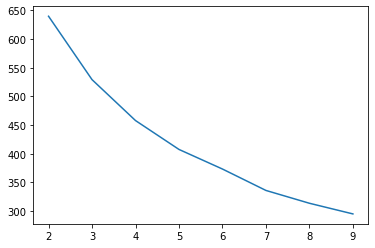

In [48]:
import matplotlib.pyplot as plt
plt.plot(li,sse)

In [49]:
li=list(range(2,9))
arr=[]
for n,each in enumerate(li):
    clust2 = KMeans(n_clusters=each)
    clust2.fit(data_scaled)
    ss=silhouette_score(data_scaled,clust2.labels_)
    print('silhoette score for',n+2,'clusters is',ss)
    arr.append(clust2.inertia_)
    
arr

silhoette score for 2 clusters is 0.3130406637213986
silhoette score for 3 clusters is 0.2165425420975878
silhoette score for 4 clusters is 0.20303939284581835
silhoette score for 5 clusters is 0.18936778686510314
silhoette score for 6 clusters is 0.18025823568394508
silhoette score for 7 clusters is 0.1829412814542615
silhoette score for 8 clusters is 0.19404469175444886


[639.5447306756045,
 529.0197348631293,
 457.0084871940537,
 412.43551343665365,
 369.30669386211946,
 337.1430774180646,
 311.411636808714]

In [50]:
#  chosing cluster=3

model_clus = KMeans(n_clusters=3,init='k-means++', random_state= 42)
model_clus.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [51]:
model_clus.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
data['cluster_id'] = model_clus.labels_
data.sample(10)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end,exp,cluster_id
50,BB McCullum (NZ),260.0,228.0,28.00,6083.0,166.0,30.41,6312.0,96.37,5.0,32.0,20.0,2002,2016,14.0,0
58,CL Hooper (WI),227.0,206.0,43.00,5761.0,113.0,35.34,7517.0,76.63,7.0,29.0,7.0,1987,2003,16.0,1
61,SK Raina (INDIA),223.0,192.0,35.00,5568.0,116.0,35.46,5938.0,93.76,5.0,36.0,14.0,2005,2015,10.0,1
44,Ijaz Ahmed (PAK),250.0,232.0,29.00,6564.0,139.0,32.33,8174.0,80.30,10.0,37.0,14.0,1986,2000,14.0,0
13,MS Dhoni (Asia/INDIA),295.0,255.0,67.66,9496.0,183.0,51.32,10706.0,88.69,10.0,64.0,8.0,2004,2017,13.0,0
41,Shoaib Malik (PAK),252.0,228.0,36.00,6765.0,143.0,35.23,8278.0,81.72,9.0,39.0,13.0,1999,2017,18.0,0
31,A Ranatunga (SL),269.0,255.0,47.00,7456.0,131.0,35.84,9571.0,77.90,4.0,49.0,18.0,1982,1999,17.0,0
46,LRPL Taylor (NZ),190.0,176.0,29.00,6486.0,131.0,44.12,7906.0,82.03,17.0,37.0,9.0,2006,2017,11.0,1
71,ADR Campbell (ZIM),188.0,184.0,14.00,5185.0,131.0,30.50,7834.0,66.18,7.0,30.0,11.0,1992,2003,11.0,1
6,JH Kallis (Afr/ICC/SA),328.0,314.0,53.00,11579.0,139.0,44.36,15885.0,72.89,17.0,86.0,17.0,1996,2014,18.0,2


In [53]:
data.groupby(['cluster_id'])['exp'].mean()

#   this shows 2nd cluster has 17 exp. ie highly experienced people are in 2nd cluster.

cluster_id
0    15.387097
1    11.564103
2    17.468889
Name: exp, dtype: float64

In [54]:
#  highest matched played by 2th cluster grp
data.groupby(['cluster_id'])['Mat'].mean()

cluster_id
0    273.451613
1    189.435897
2    386.858444
Name: Mat, dtype: float64

In [55]:
data.groupby(['cluster_id'])[features].mean()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp
cluster_id,,,,,,,,,,,,
0,273.451613,257.225806,32.214839,8244.612903,152.000000,37.107742,10331.935484,80.693465,11.967742,49.129032,15.354839,15.387097
1,189.435897,177.153846,26.282051,5852.205128,143.075385,39.335621,7568.692308,78.083077,8.461538,36.051282,9.948718,11.564103
2,386.858444,368.353333,38.555556,12749.360000,164.222222,39.847778,16334.908889,78.634444,21.908889,81.962222,19.986667,17.468889


In [56]:
data.groupby(['cluster_id']).count()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end,exp
cluster_id,,,,,,,,,,,,,,,
0,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
1,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
2,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [57]:
y_predicted = model_clus.fit_predict(data_scaled)

In [58]:
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [59]:
data_scaled[y_predicted == 0,0]



array([ 7.38913657e-01,  1.16228369e+00,  5.88685579e-01,  5.75028481e-01,
        6.84285265e-01,  1.21691209e+00, -3.12682889e-01,  8.61827539e-01,
        3.29200717e-01,  2.87445609e-02,  3.15543619e-01,  8.07199147e-01,
       -9.41693210e-02,  3.15543619e-01, -1.22267331e-02,  8.33729529e-02,
        4.24016589e-02,  2.09096636e+00,  4.79428795e-01,  1.43036492e-03,
        1.09399820e+00,  3.29200717e-01, -1.62454811e-01,  2.74572325e-01,
        5.20400089e-01, -2.99025791e-01,  9.70300509e-02, -3.26339987e-01,
        6.97158549e-02,  3.83829109e-01,  2.06286835e-01])

In [60]:
model_clus.cluster_centers_

array([[ 0.38999683,  0.3877369 ,  0.15484422,  0.2805111 ,  0.09985375,
        -0.24045124,  0.22199633,  0.16141647,  0.08192418,  0.16805168,
         0.37186837,  0.5057181 ],
       [-0.75741403, -0.76774864, -0.2615004 , -0.72433107, -0.19587569,
         0.13893838, -0.6797753 , -0.11520335, -0.3981141 , -0.64124503,
        -0.5670423 , -0.66591796],
       [ 1.93880504,  1.99137257,  0.59981607,  2.17256308,  0.50485395,
         0.2261546 ,  2.18103894, -0.05677556,  1.44297783,  2.19988378,
         1.17630335,  1.14372658]])

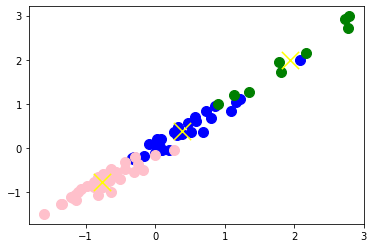

In [64]:
plt.scatter(data_scaled[y_predicted==0,0],data_scaled[y_predicted==0,1],c='blue',label='Cluster 1',s=100)
plt.scatter(data_scaled[y_predicted==1,0],data_scaled[y_predicted==1,1],c='pink',label='Cluster 2',s=100)
plt.scatter(data_scaled[y_predicted==2,0],data_scaled[y_predicted==2,1],c='green',label='Cluster 3',s=100)
plt.scatter(model_clus.cluster_centers_[:,0],model_clus.cluster_centers_[:,1],c='yellow',label='centers',s=300, marker='x',)
plt.show()

# Hierarchial clustering

In [144]:
#  hierarchial clustering 

from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

data_scaled

array([[ 2.77500871e+00,  2.93177163e+00,  7.73129979e-01,
         2.84387222e+00,  1.69039999e+00,  1.07458656e+00,
         2.97838917e+00,  7.48116868e-01,  3.12302950e+00,
         2.92378300e+00,  1.17861903e+00,  2.59980337e+00],
       [ 2.17378333e+00,  2.16508143e+00,  7.73129979e-01,
         2.84295124e+00,  6.63172211e-01,  5.89254722e-01,
         2.74009831e+00, -3.28736891e-02,  1.86618534e+00,
         2.88293990e+00,  3.10241582e-01,  3.87084249e-01],
       [ 1.77759075e+00,  1.94813372e+00,  6.32560642e-01,
         2.61701220e+00,  4.97490312e-01,  5.97769316e-01,
         2.41310024e+00,  1.29258679e-01,  2.55074098e+00,
         2.20222160e+00,  1.17861903e+00,  1.00002583e+00],
       [ 2.73391765e+00,  2.93163000e+00, -8.43417399e-01,
         2.50020597e+00,  1.32589981e+00, -1.04895311e+00,
         1.65565262e+00,  1.27478214e+00,  2.27691872e+00,
         1.33585286e+00,  3.06820835e+00,  2.53237980e+00],
       [ 2.77490309e+00,  2.71468229e+00,  6.3256064

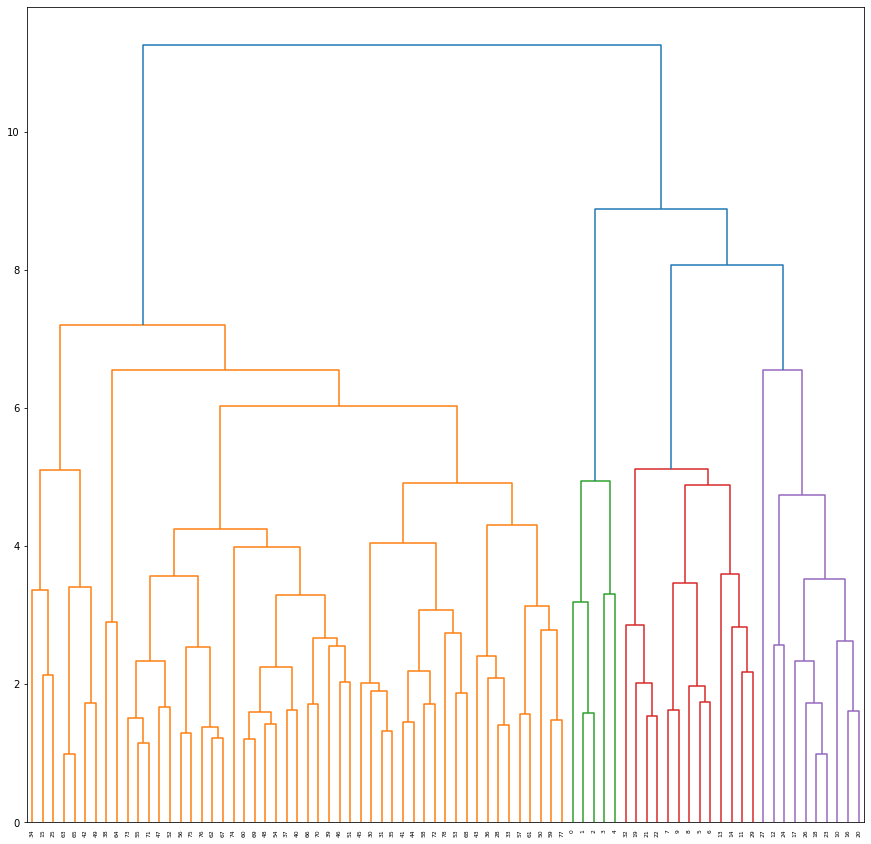

In [160]:
lkge_complete = linkage(data_scaled,method='complete',metric='euclidean')
plt.figure(figsize=(15,15))
dendrogram(lkge_complete)
plt.show()

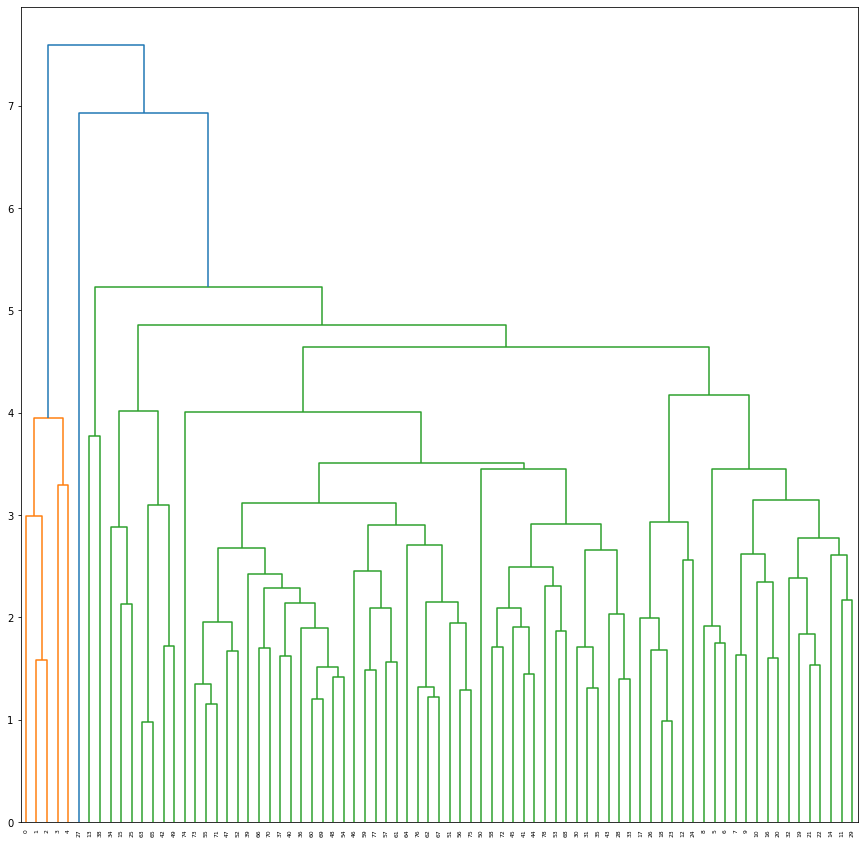

In [163]:
lkge_avg = linkage(data_scaled,method='average',metric='euclidean')
plt.figure(figsize=(15,15))
dendrogram(lkge_avg)
plt.show()

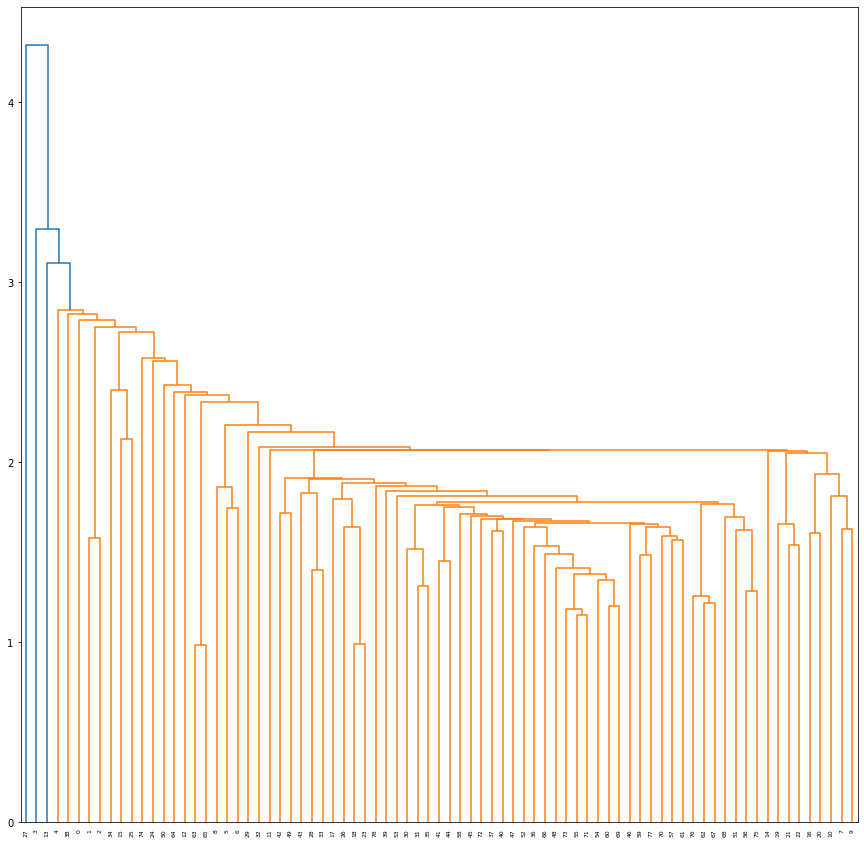

In [162]:
lkge_single = linkage(data_scaled,method='single',metric='euclidean')
plt.figure(figsize=(15,15))
dendrogram(lkge_single)
plt.show()

In [170]:
#  choosing the complete linkage bcoz it is much proper and we might be able to easily understand the data.

cluster_label = cut_tree(lkge_complete,n_clusters=3).reshape(79,)

In [171]:
pd.Series(cluster_label).value_counts()

2    51
1    23
0     5
dtype: int64

In [181]:
 data['cluster_hierarchial']=cluster_label
data.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_hierarchial
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,0
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,0
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,0


In [193]:
data.groupby(['cluster_hierarchial'])[features].mean()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0,exp
cluster_hierarchial,,,,,,,,,,,
0,427.000000,409.600000,35.600000,14488.800000,38.914000,17441.200000,83.128000,30.200000,83.200000,23.400000,18.800000
1,291.956522,276.043478,33.913043,9337.217391,39.067826,11835.478261,80.703043,14.434783,57.739130,15.173913,15.652174
2,206.098039,192.470588,27.745098,6169.274510,38.239412,7953.921569,78.284706,8.431373,37.745098,11.392157,12.392157


In [192]:
data.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster_hierarchial,start,end,exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,0,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,0,2000,2015,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,0,1995,2012,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,0,1989,2011,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,0,1998,2015,17


# PCA

In [72]:
from sklearn.datasets import load_digits

In [73]:
dataset = load_digits()

In [74]:
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [38]:
dataset.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [41]:
dataset.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [5]:
dataset.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
dataset['data'].shape

(1797, 64)

In [7]:
dataset.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
from sklearn.datasets import load_digits
dataset = load_digits()
dataset.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
dataset['data'].shape

(1797, 64)

In [10]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
dataset.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [75]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [13]:
dataset.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

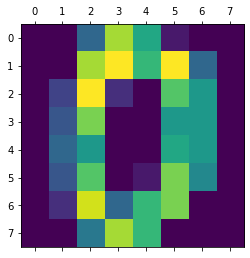

In [15]:
import matplotlib.pyplot as plt

plt.matshow(dataset.data[0].reshape(8,8))

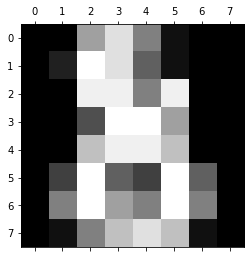

In [16]:

plt.matshow(dataset.data[-1].reshape(8,8))
plt.gray()

In [76]:
df.isnull().sum().sum()

0

In [77]:
x=df
y=dataset.target

In [19]:
from sklearn.preprocessing import StandardScaler
stsc = StandardScaler()

df_scaled = stsc.fit_transform(df)
df_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [35]:
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,...,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03
mean,0.0,-2.560865e-16,-2.347717e-16,-3.053268e-16,1.396892e-16,-3.169418e-16,-9.595984e-16,6.069466e-16,-4.623690e-16,7.550850e-17,...,4.715822e-16,-4.920321e-16,2.253538e-16,3.441259e-16,5.952698e-17,-6.114606e-16,-5.190926e-16,1.695299e-16,1.787972e-16,-6.838961e-16
std,0.0,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,...,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00
min,0.0,-3.350165e-01,-1.094937e+00,-2.786437e+00,-2.764242e+00,-1.020657e+00,-4.097239e-01,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-7.574358e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-1.089383e+00,-2.764171e+00,-2.394110e+00,-1.146647e+00,-5.056698e-01,-1.960075e-01
25%,0.0,-3.350165e-01,-8.845657e-01,-4.321998e-01,-4.311703e-01,-1.020657e+00,-4.097239e-01,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-7.574358e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-8.933661e-01,-2.490095e-01,-3.667712e-01,-1.146647e+00,-5.056698e-01,-1.960075e-01
50%,0.0,-3.350165e-01,-2.534522e-01,2.740715e-01,2.687512e-01,-3.145470e-01,-4.097239e-01,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-5.541027e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-3.053152e-01,2.082926e-01,4.441644e-01,-1.295226e-01,-5.056698e-01,-1.960075e-01
75%,0.0,-3.350165e-01,7.984036e-01,7.449191e-01,7.353655e-01,9.211453e-01,-4.097239e-01,-1.250229e-01,-5.907756e-02,3.148782e-01,...,6.658963e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,8.707865e-01,8.942457e-01,8.496321e-01,8.876023e-01,-1.660165e-02,-1.960075e-01
max,0.0,8.485857e+00,2.271002e+00,9.803428e-01,9.686727e-01,1.803783e+00,4.402524e+00,1.433847e+01,2.117340e+01,4.383391e+00,...,2.495895e+00,1.299989e+01,4.237924e+01,9.336462e+00,2.046888e+00,8.942457e-01,8.496321e-01,1.565686e+00,3.406875e+00,8.407974e+00


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9611111111111111

In [22]:
x.shape,y.shape

((1797, 64), (1797,))

In [23]:
from sklearn.decomposition import PCA
model_pca= PCA(n_components=0.99)
x_pca = model_pca.fit_transform(x)
x_pca.shape

(1797, 41)

In [24]:
model_pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 , 0.00428888,
       0.00373606, 0.00353274, 0.00336684, 0.0032803 , 0.00308321,
       0.00293779, 0.00256589, 0.00227742, 0.00222278, 0.0021143 ,
       0.00189909])

In [25]:
model_pca.explained_variance_

array([179.0069301 , 163.71774688, 141.78843909, 101.1003752 ,
        69.51316559,  59.10852489,  51.88453911,  44.01510667,
        40.31099529,  37.0117984 ,  28.51904118,  27.32116981,
        21.90148814,  21.32435654,  17.63672222,  16.94686385,
        15.85138991,  15.00446022,  12.23447318,  10.88685932,
        10.69356625,   9.58259779,   9.2264026 ,   8.69036872,
         8.3656119 ,   7.16577961,   6.91973881,   6.19295508,
         5.88499123,   5.1558669 ,   4.49129656,   4.24687799,
         4.04743883,   3.94340334,   3.70647245,   3.53165306,
         3.08457409,   2.73780002,   2.67210896,   2.54170563,
         2.28298744])

In [26]:
model_pca.explained_variance_ratio_.sum()

0.9901018242795546

In [28]:
model_pca.explained_variance_.sum()

1190.248642863806

In [29]:
model_pca.n_components_

41

In [69]:
x_pca

array([[ -1.25946574,  21.2748807 ],
       [  7.9576169 , -20.7687108 ],
       [  6.99191993,  -9.95597859],
       ...,
       [ 10.80127707,  -6.96024232],
       [ -4.87209217,  12.42394578],
       [ -0.34439979,   6.36556813]])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=30)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 2), (360, 2), (1437,), (360,))

In [68]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6055555555555555

In [42]:
from sklearn.decomposition import PCA
model_pca= PCA(n_components=2)
x_pca = model_pca.fit_transform(x)
x_pca.shape

(1797, 2)

In [43]:
model_pca.explained_variance_ratio_.sum()

0.28509364823693883

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=30)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6055555555555555

In [53]:
x_pca.size

3594

Text(0, 0.5, '2nd Principal component')

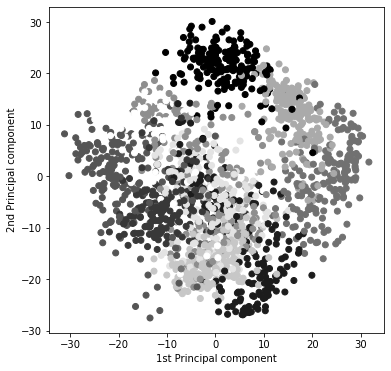

In [63]:
plt.figure(figsize=(6,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=dataset.target)
plt.xlabel('1st Principal component')
plt.ylabel('2nd Principal component')

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,model.predict(X_train))

0.6061238691718859

## PCA using MLE (Maximum Likelihood Estimate (MLE) criterion.)

In [78]:
from sklearn.decomposition import PCA
model_pca= PCA(n_components='mle')
x_pca = model_pca.fit_transform(x)
x_pca.shape

(1797, 61)

In [79]:
x.shape

(1797, 64)

# LDA  - Latent Dirichlet Allocation

## https://www.kaggle.com/code/naushads/1-2-amazon-fine-food-reviews-eda-data-cleaning-fe

## Amazon Fine Food Dataset

In [2]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [3]:
data = pd.read_csv('Reviews.csv')

In [4]:
data.shape

(568454, 10)

In [62]:
str='I love india'
for each in str.split(' '):
    print(each)

I
love
india


In [99]:
data.columns

# Attribute Information
# Id - Row Id
# ProductId - Unique identifier for the product
# UserId - Unqiue identifier for the user
# ProfileName - Profile name of the user
# HelpfulnessNumerator - Number of users who found the review helpful
# HelpfulnessDenominator - Number of users who indicated whether they found the review helpful or not
# Score - Rating between 1 and 5
# Time - Timestamp for the review
# Summary - Brief summary of the review
# Text - Text of the review

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [15]:
data.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [30]:
with pd.option_context('display.max_colwidth', -1,'display.max_columns',7,'display.max_rows',5):
    display(data.head(16))

,Id,ProductId,UserId,...,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,...,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,B00813GRG4,A1D87F6ZCVE5NK,...,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
...,...,...,...,...,...,...,...
14,15,B001GVISJM,A2MUGFV2TDQ47K,...,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasure - yummy. Six pounds will be around for a while with my son and I.
15,16,B001GVISJM,A1CZX3CP8IKQIJ,...,1262044800,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment of six pounds really hit the spot. It's exactly what you would expect...six packages of strawberry twizzlers.


In [31]:
data['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [96]:
data['ProductId'].value_counts() # Length: 74258 - So distinct Product ID reviews we have are 74258

B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
             ... 
B004DSPTTM      1
B008C9QWU8      1
B007O5A6BM      1
B003Q4TZ08      1
B001LR2CU2      1
Name: ProductId, Length: 74258, dtype: int64

In [97]:
data['UserId'].value_counts()  # 256059 - So 256059 distinct users have given feedback on 74258 products.

A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A2O8OFVSTO9PF3      1
A1C6KXG47GAQ7B      1
A1TU5DS89D9OVD      1
A3N005JS5FG5FI      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64

In [69]:
data['UserId'].value_counts()>50

A3OXHLG6DIBRW8     True
A1YUL9PCJR3JTY     True
AY12DBB0U420B      True
A281NPSIMI1C2R     True
A1Z54EM24Y40LL     True
                  ...  
A2O8OFVSTO9PF3    False
A1C6KXG47GAQ7B    False
A1TU5DS89D9OVD    False
A3N005JS5FG5FI    False
A3LGQPJCZVL9UC    False
Name: UserId, Length: 256059, dtype: bool

In [64]:
arr=data['UserId'].value_counts()>50
count=0
for a in arr:
    if(a==True):
        count+=1
count

260

In [66]:
data['ProfileName'].nunique()

218416

In [67]:
data['ProfileName'].value_counts()

C. F. Hill "CFH"                               451
O. Brown "Ms. O. Khannah-Brown"                421
Gary Peterson                                  389
Rebecca of Amazon "The Rebecca Review"         365
Chris                                          363
                                              ... 
Steven Wolff                                     1
joycomeau                                        1
Lizz                                             1
Phyllis A. De Smet-Howard "tweedsmerewillo"      1
srfell17                                         1
Name: ProfileName, Length: 218416, dtype: int64

In [71]:
data.shape

(568454, 10)

# Datapoints with Missing/Null Features

In [76]:
data.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [80]:
# Observations:
# There are 16 datapoints having 'ProfileName' as Null.
# There are 27 datapoints having 'Summary' as Null.
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [88]:
reviews_data_v1 = data[['Text']]
reviews_data_v1

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
...,...
568449,Great for sesame chicken..this is a good if no...
568450,I'm disappointed with the flavor. The chocolat...
568451,"These stars are small, so you can give 10-15 o..."
568452,These are the BEST treats for training and rew...


In [81]:
data.Text.iloc[0][0]

'I'

In [82]:
txt = data[['Text']].iloc[0][0]
txt

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [ ]:
# removing the punctuations & digits & lower casing the words in the text

In [115]:
str='I Love India!$'
for each in string.punctuation:
    str=str.replace(each,'')
    
for num in str.split(' '):
    if not num.isdigit():
        str1.append(num)
str.lower()

'i love india'

In [83]:
 ## removing the punctuations
    
for punc_char in string.punctuation:
    txt = txt.replace(punc_char,' ')
    


'I have bought several of the Vitality canned dog food products and have found them all to be of good quality  The product looks more like a stew than a processed meat and it smells better  My Labrador is finicky and she appreciates this product better than  most '

In [81]:
## removing the digits
# in one line 
txt1=' '.join([w for w in txt.split(' ') if not w.isdigit()])
txt1

# in multiple lines
new_str = []
for w in txt.split(' '):
    if not w.isdigit():
        new_str.append(w)
        

' '.join(new_str)

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality  The product looks more like a stew than a processed meat and it smells better  My Labrador is finicky and she appreciates this product better than  most '

In [116]:
# to apply to complete data text create a function of above -

# remove punctuatuons and digits and convert to lower case
def punc_digit_removal(txt):
    for punc_char in string.punctuation:
        txt = txt.replace(punc_char,' ')
        
    txt1=' '.join([w for w in txt.split(' ') if not w.isdigit()])
    
    return txt1.lower()

In [119]:
data['Text_1']=data['Text'].apply(punc_digit_removal)

In [120]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_1
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wid...


In [135]:
with pd.option_context('display.max_rows',6,'display.max_columns',6,'display.max_colwidth',3):
    display(data)

,Id,ProductId,UserId,...,Summary,Text,Text_1
0,1,B001E4KFG0,A3SGXH7AUHU8GW,...,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most
1,2,B00813GRG4,A1D87F6ZCVE5NK,...,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",product arrived labeled as jumbo salted peanuts the peanuts were actually small sized unsalted not sure if this was an error or if the vendor intended to represent the product as jumbo
2,3,B000LQOCH0,ABXLMWJIXXAIN,...,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",this is a confection that has been around a few centuries it is a light pillowy citrus gelatin with nuts in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar and it is a tiny mouthful of heaven not too chewy and very flavorful i highly recommend this yummy treat if you are familiar with the story of c s lewis the lion the witch and the wardrobe this is the treat that seduces edmund into selling out his brother and sisters to the witch
...,...,...,...,...,...,...,...
568451,568452,B004I613EE,A121AA1GQV751Z,...,Perfect for our maltipoo,"These stars are small, so you can give 10-15 of those in one training session. I tried to train our dog with ""Ceaser dog treats"", it just made our puppy hyper. If you compare the ingredients, you will know why. Little stars has just basic food ingredients without any preservatives and food coloring. Sweet potato flavor also did not make my hand smell like dog food.",these stars are small so you can give of those in one training session i tried to train our dog with ceaser dog treats it just made our puppy hyper if you compare the ingredients you will know why little stars has just basic food ingredients without any preservatives and food coloring sweet potato flavor also did not make my hand smell like dog food
568452,568453,B004I613EE,A3IBEVCTXKNOH,...,Favorite Training and reward treat,These are the BEST treats for training and rewarding your dog for being good while grooming. Lower in calories and loved by all the doggies. Sweet potatoes seem to be their favorite Wet Noses treat!,these are the best treats for training and rewarding your dog for being good while grooming lower in calories and loved by all the doggies sweet potatoes seem to be their favorite wet noses treat
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,...,Great Honey,"I am very satisfied ,product is as advertised, I use it on cereal, with raw vinegar, and as a general sweetner.",i am very satisfied product is as advertised i use it on cereal with raw vinegar and as a general sweetner


In [87]:
data['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [88]:
data['Text_modified'][0]

'i have bought several of the vitality canned dog food products and have found them all to be of good quality  the product looks more like a stew than a processed meat and it smells better  my labrador is finicky and she appreciates this product better than  most '

In [138]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LPT-3036\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [140]:
from nltk.corpus import stopwords

stop_words = stopwords.words('English')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [167]:
str = 'I i am girl beauty my My'
str1=[]
for each in str.split(' '):
    if(each not in stop_words):
        str1.append(each)
        
' '.join(str1)

'I girl beauty My'

In [194]:
def remove_punc_digit_tolower_stopwrds(str):
    # remove punc
    for each in string.punctuation:
        str=str.replace(each,'')
    str1=[]
    # remove digit
    for num in str.split(' '):
        if not num.isdigit():
            str1.append(num)
    str=' '.join(str1)
    str = str.lower()
    # remove stop words
    str1=[]
    for each in str.split(' '):
        if(each not in stop_words):
            str1.append(each)

    return ' '.join(str1)
    
    
remove_punc_digit_tolower_stopwrds( 'I i am girl beauty my111 My !! 11')

'girl beauty my111 '

In [193]:
data['Text_rmv_stpwrd'] = data['Text'].apply(remove_punc_digit_tolower_stopwrds)

In [195]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_1,Text_rmv_stpwrd
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that has been around a fe...,confection around centuries light pillowy cit...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wid...,great taffy great price wide assortment yummy...


In [96]:
txt = data['Text_modified'][0]
txt

'i have bought several of the vitality canned dog food products and have found them all to be of good quality  the product looks more like a stew than a processed meat and it smells better  my labrador is finicky and she appreciates this product better than  most '

In [97]:
# multiple lines
for w in txt.split(' '):
    if w not in stop_words:
        w
        
# single line 
' '.join([w for w in txt.split(' ') if w not in stop_words])

'bought several vitality canned dog food products found good quality  product looks like stew processed meat smells better  labrador finicky appreciates product better  '

In [98]:
def remove_stop_words(txt):
    return ' '.join([w for w in txt.split(' ') if w not in stop_words])

data['Text_modified']=data['Text_modified'].apply(remove_stop_words)

In [99]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_modified
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts ...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around centuries light pillowy c...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yumm...


In [103]:
# Stemming - Over stemming is the process where a much larger part of a word is chopped off than what is required, which in turn leads to two or more words being reduced to the same root word or stem incorrectly when they should have been reduced to two or more stem words. For example, university and universe. or create, creating, created...
from nltk.stem import PorterStemmer
ps=PorterStemmer()

ps.stem('flying')

'fli'

In [102]:
ps.stem('fly')

'fli'

In [104]:
ps.stem('create')

'creat'

In [105]:
ps.stem('created')

'creat'

In [106]:
ps.stem('creating')

'creat'

In [107]:
ps.stem('creat')

'creat'

In [118]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def stemming(txt):
    return ps.stem(txt)

In [119]:
data['Text_modified']=data['Text_modified'].apply(stemming)

In [120]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_modified
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,None
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,None
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,None
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,None
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,None


In [211]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

str = ['bought',
 'several',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'found',
 'good',
 'quality',
 'product',
 'looks',
 'like',
 'stew',
 'processed',
 'meat',
 'smells',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better',
 '']
# data['tokenized text'][0]
' '.join(ps.stem(w) for w in str)
# ps.stem('finicky')

'bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better '

In [206]:
#  stemming nd remove stop words in same line

from nltk.stem import PorterStemmer
ps=PorterStemmer()
#     ps.stem(txt)
    
def remove_stop_words(txt):
    return ' '.join([ps.stem(w) for w in txt.split(' ')])

data['Text_stemmed_data']=data['tokenized text'].apply(remove_stop_words)  

AttributeError: 'list' object has no attribute 'split'

In [219]:
# remove stemming

from nltk.stem import PorterStemmer
ps=PorterStemmer()

def remove_stemming(str):
    return ' '.join(ps.stem(w) for w in str)
data['Text_stemmed_data']=data['tokenized text'].apply(remove_stemming) 

In [199]:
#  TOKENIZATION  - split of text  -- basically converting text into array of words

data['tokenized text'] = data['Text_rmv_stpwrd'].str.split(' ')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_1,Text_rmv_stpwrd,tokenized text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,bought several vitality canned dog food produc...,"[bought, several, vitality, canned, dog, food,..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,product arrived labeled jumbo salted peanutsth...,"[product, arrived, labeled, jumbo, salted, pea..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that has been around a fe...,confection around centuries light pillowy cit...,"[confection, around, centuries, , light, pillo..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,"[looking, secret, ingredient, robitussin, beli..."
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wid...,great taffy great price wide assortment yummy...,"[great, taffy, great, price, , wide, assortmen..."


In [220]:
with pd.option_context('display.max_colwidth',6):
    display(data.head())

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_1,Text_rmv_stpwrd,tokenized text,Text_stemmed_data
0,1,B0...,A3...,de...,1,1,5,13...,Go...,I ...,i ...,bo...,[b...,bo...
1,2,B0...,A1...,dl...,0,0,1,13...,No...,Pr...,pr...,pr...,[p...,pr...
2,3,B0...,AB...,Na...,1,1,4,12...,"""D...",Th...,th...,co...,[c...,co...
3,4,B0...,A3...,Karl,3,3,2,13...,Co...,If...,if...,lo...,[l...,lo...
4,5,B0...,A1...,Mi...,0,0,5,13...,Gr...,Gr...,gr...,gr...,[g...,gr...


In [222]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_1,Text_rmv_stpwrd,tokenized text,Text_stemmed_data
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,bought several vitality canned dog food produc...,"[bought, several, vitality, canned, dog, food,...",bought sever vital can dog food product found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,product arrived labeled jumbo salted peanutsth...,"[product, arrived, labeled, jumbo, salted, pea...",product arriv label jumbo salt peanutsth peanu...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that has been around a fe...,confection around centuries light pillowy cit...,"[confection, around, centuries, , light, pillo...",confect around centuri light pillowi citru ge...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,"[looking, secret, ingredient, robitussin, beli...",look secret ingredi robitussin believ found g...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wid...,great taffy great price wide assortment yummy...,"[great, taffy, great, price, , wide, assortmen...",great taffi great price wide assort yummi taf...


# gENSim

In [218]:
import gensim
from gensim import corpora

In [223]:
#  we get all the distinct words in dictionary form with an ID assigned to each variable
Data_Dictionary = corpora.Dictionary(data['tokenized text'])
Data_Dictionary

In [228]:
tokenized_text = data['tokenized text'].to_list()
tokenized_text

[['bought',
  'several',
  'vitality',
  'canned',
  'dog',
  'food',
  'products',
  'found',
  'good',
  'quality',
  'product',
  'looks',
  'like',
  'stew',
  'processed',
  'meat',
  'smells',
  'better',
  'labrador',
  'finicky',
  'appreciates',
  'product',
  'better',
  ''],
 ['product',
  'arrived',
  'labeled',
  'jumbo',
  'salted',
  'peanutsthe',
  'peanuts',
  'actually',
  'small',
  'sized',
  'unsalted',
  'sure',
  'error',
  'vendor',
  'intended',
  'represent',
  'product',
  'jumbo'],
 ['confection',
  'around',
  'centuries',
  '',
  'light',
  'pillowy',
  'citrus',
  'gelatin',
  'nuts',
  '',
  'case',
  'filberts',
  'cut',
  'tiny',
  'squares',
  'liberally',
  'coated',
  'powdered',
  'sugar',
  '',
  'tiny',
  'mouthful',
  'heaven',
  '',
  'chewy',
  'flavorful',
  '',
  'highly',
  'recommend',
  'yummy',
  'treat',
  '',
  'familiar',
  'story',
  'cs',
  'lewis',
  'lion',
  'witch',
  'wardrobe',
  '',
  'treat',
  'seduces',
  'edmund',
  'sell

In [225]:
Data_Dict_stemmed = corpora.Dictionary(data['Text_stemmed_data'])
tokenized_text_arr = data['Text_stemmed_data'].to_list()
tokenized_text_arr

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [226]:
data['Text_stemmed_data_new'] = data['Text_stemmed_data'].str.split(' ')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_1,Text_rmv_stpwrd,tokenized text,Text_stemmed_data,Text_stemmed_data_new
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,bought several vitality canned dog food produc...,"[bought, several, vitality, canned, dog, food,...",bought sever vital can dog food product found ...,"[bought, sever, vital, can, dog, food, product..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,product arrived labeled jumbo salted peanutsth...,"[product, arrived, labeled, jumbo, salted, pea...",product arriv label jumbo salt peanutsth peanu...,"[product, arriv, label, jumbo, salt, peanutsth..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that has been around a fe...,confection around centuries light pillowy cit...,"[confection, around, centuries, , light, pillo...",confect around centuri light pillowi citru ge...,"[confect, around, centuri, , light, pillowi, c..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,"[looking, secret, ingredient, robitussin, beli...",look secret ingredi robitussin believ found g...,"[look, secret, ingredi, robitussin, believ, fo..."
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wid...,great taffy great price wide assortment yummy...,"[great, taffy, great, price, , wide, assortmen...",great taffi great price wide assort yummi taf...,"[great, taffi, great, price, , wide, assort, y..."


In [227]:
Data_Dict_stemmed = corpora.Dictionary(data['Text_stemmed_data_new'])
tokenized_text_arr = data['Text_stemmed_data_new'].to_list()
tokenized_text_arr

[['bought',
  'sever',
  'vital',
  'can',
  'dog',
  'food',
  'product',
  'found',
  'good',
  'qualiti',
  'product',
  'look',
  'like',
  'stew',
  'process',
  'meat',
  'smell',
  'better',
  'labrador',
  'finicki',
  'appreci',
  'product',
  'better',
  ''],
 ['product',
  'arriv',
  'label',
  'jumbo',
  'salt',
  'peanutsth',
  'peanut',
  'actual',
  'small',
  'size',
  'unsalt',
  'sure',
  'error',
  'vendor',
  'intend',
  'repres',
  'product',
  'jumbo'],
 ['confect',
  'around',
  'centuri',
  '',
  'light',
  'pillowi',
  'citru',
  'gelatin',
  'nut',
  '',
  'case',
  'filbert',
  'cut',
  'tini',
  'squar',
  'liber',
  'coat',
  'powder',
  'sugar',
  '',
  'tini',
  'mouth',
  'heaven',
  '',
  'chewi',
  'flavor',
  '',
  'highli',
  'recommend',
  'yummi',
  'treat',
  '',
  'familiar',
  'stori',
  'cs',
  'lewi',
  'lion',
  'witch',
  'wardrob',
  '',
  'treat',
  'seduc',
  'edmund',
  'sell',
  'brother',
  'sister',
  'witch'],
 ['look',
  'secret',
 

In [230]:
# a list to create Doc-term matrix

## A document-term matrix (DTM) is a mathematical representation of text data where each row represents a document and each column represents a term. The cells of the matrix contain the frequency of occurrence of each term in each document.

doc_term_matrix_stemmed = [Data_Dict_stemmed.doc2bow(review) for review in tokenized_text_arr]

In [232]:
corpora.mmcorpus()

TypeError: 'module' object is not callable

In [234]:
doc_term_matrix_tokenised = [Data_Dictionary.doc2bow(review) for review in tokenized_text]
doc_term_matrix_tokenised

[[(0, 1),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(15, 2),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1)],
 [(0, 7),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 2),
  (71, 1),
  (72, 2),
  (73, 1)],
 [(0, 2),
  (8, 1),
  (9, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),

In [235]:
LDA = gensim.models.ldamodel.LdaModel

lda_model = LDA(corpus=doc_term_matrix_stemmed,
                id2word=Data_Dict_stemmed,
                num_topics=5,
                iterations=100,
               random_state=100)

In [236]:
lda_model.print_topics()

[(0,
  '0.048*"br" + 0.015*"" + 0.014*"tast" + 0.013*"use" + 0.012*"water" + 0.011*"like" + 0.010*"sugar" + 0.010*"product" + 0.009*"drink" + 0.008*"flavor"'),
 (1,
  '0.066*"" + 0.018*"tea" + 0.015*"order" + 0.015*"product" + 0.014*"amazon" + 0.013*"price" + 0.011*"bag" + 0.011*"buy" + 0.011*"store" + 0.010*"box"'),
 (2,
  '0.050*"" + 0.045*"coffe" + 0.022*"flavor" + 0.018*"like" + 0.018*"tast" + 0.017*"cup" + 0.014*"tri" + 0.012*"tea" + 0.011*"good" + 0.011*"one"'),
 (3,
  '0.061*"" + 0.018*"tast" + 0.017*"like" + 0.014*"flavor" + 0.013*"good" + 0.011*"great" + 0.011*"love" + 0.010*"tri" + 0.009*"chocol" + 0.009*"eat"'),
 (4,
  '0.045*"" + 0.030*"food" + 0.025*"dog" + 0.020*"treat" + 0.014*"love" + 0.013*"cat" + 0.012*"eat" + 0.010*"like" + 0.010*"one" + 0.009*"get"')]

In [237]:
LDA = gensim.models.ldamodel.LdaModel

lda_model = LDA(corpus=doc_term_matrix_tokenised,
                id2word=Data_Dictionary,
                num_topics=5,
                iterations=100,
               random_state=100)

In [238]:
lda_model.print_topics()

[(0,
  '0.031*"br" + 0.017*"use" + 0.015*"water" + 0.012*"oil" + 0.010*"hot" + 0.009*"add" + 0.009*"make" + 0.009*"mix" + 0.008*"sauce" + 0.007*"coconut"'),
 (1,
  '0.073*"" + 0.013*"product" + 0.012*"amazon" + 0.010*"great" + 0.010*"price" + 0.008*"good" + 0.008*"buy" + 0.008*"get" + 0.007*"find" + 0.007*"one"'),
 (2,
  '0.042*"" + 0.022*"food" + 0.013*"dog" + 0.010*"br" + 0.009*"one" + 0.008*"treats" + 0.008*"like" + 0.008*"dogs" + 0.006*"cat" + 0.006*"loves"'),
 (3,
  '0.047*"" + 0.037*"coffee" + 0.032*"tea" + 0.016*"like" + 0.014*"flavor" + 0.013*"taste" + 0.011*"cup" + 0.011*"good" + 0.011*"drink" + 0.010*"one"'),
 (4,
  '0.056*"" + 0.020*"like" + 0.016*"taste" + 0.013*"good" + 0.012*"br" + 0.012*"flavor" + 0.009*"great" + 0.008*"love" + 0.008*"sugar" + 0.008*"chips"')]

In [240]:
ps.stem('tasty')

'tasti'